In [1]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
import module.helper_function as hf
import module.cell_456 as cell_456

PATH = r'D:\code-example\my_research\mnist_cnn\printed_digit\images'
PATH_SAVE = r'D:\code-example\my_research\mnist_cnn\printed_digit\data'

In [59]:
folder_number = 3
file_names = os.listdir(os.path.join(PATH, str(folder_number)))
file_dirs = [os.path.join(PATH, str(folder_number), file_name) for file_name in file_names]

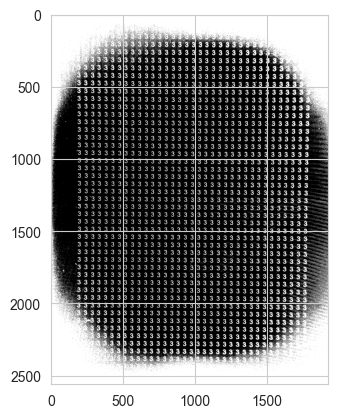

In [60]:
img = cv2.imread(file_dirs[0], 0)
_, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(img_bin, cmap='gray')

# TRY IN SMALL IMAGE

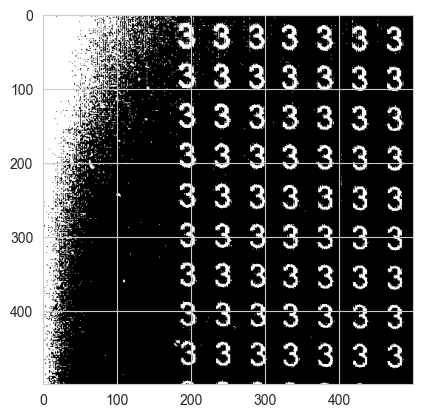

In [61]:
small_img = img_bin[500:1000, :500]
plt.imshow(small_img, cmap='gray')

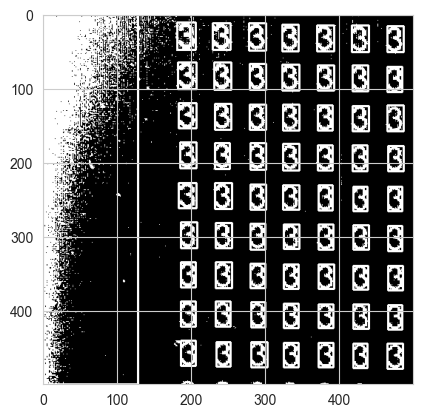

In [62]:
#find contours
contours, hierarchy = cv2.findContours(small_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

small_img_cp = small_img.copy()
numbers = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if h < 20 or w < 15: continue
    cv2.rectangle(small_img_cp, (x, y), (x + w, y + h), (255, 255, 255), 2)
    numbers.append(small_img[y:y + h, x:x + w])
plt.imshow(small_img_cp, cmap='gray')

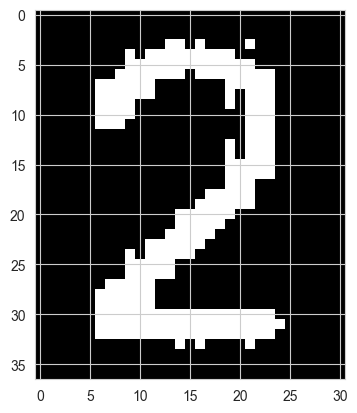

In [9]:
for i in range(len(numbers)):
    w = numbers[i].shape[1]
    temp = cell_456.shrink_image(numbers[i])
    numbers[i] = cell_456.extend_image(temp, max(w // 8, 3))
plt.imshow(numbers[0], cmap='gray')

# TRY IN ORIGINAL IMAGE

In [57]:
def noise_filter(image):
    img_cp = image.copy()
    contours, hierarchy = cv2.findContours(img_cp, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    has_changed = False
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if h > 8: continue
        img_cp[y:y + h, x:x + w] = 0
        has_changed = True

    if has_changed:
        img_cp = cell_456.shrink_image(img_cp)
        img_cp = cell_456.extend_image(img_cp, max(img_cp.shape[1] // 8, 3))

    return img_cp

In [43]:
#find contours
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_bin_cp = img_bin.copy()
numbers = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if h < 20 or w < 15: continue
    cv2.rectangle(img_bin_cp, (x, y), (x + w, y + h), (255, 255, 255), 2)
    numbers.append(img_bin[y:y + h, x:x + w])

for i in range(len(numbers)):
    w = numbers[i].shape[1]
    temp = cell_456.shrink_image(numbers[i])
    temp = cell_456.extend_image(temp, max(w // 8, 3))
    temp = cv2.medianBlur(temp, 3)
    temp = cv2.blur(temp, (3, 3))
    _, temp = cv2.threshold(temp, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    numbers[i] = temp

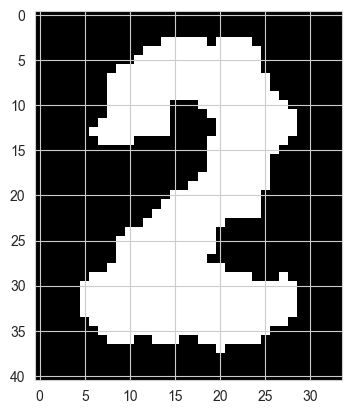

In [58]:
temp = noise_filter(numbers[3])
plt.imshow(temp, cmap='gray')
# plt.imshow(numbers[3], cmap='gray')
# plt.imshow(numbers[0], cmap='gray')

In [11]:
path_save = os.path.join(PATH_SAVE, str(folder_number))
if not os.path.exists(path_save):
    os.makedirs(path_save)
for i in range(len(numbers)):
    cv2.imwrite(os.path.join(path_save, str(i) + '.png'), numbers[i])


KeyboardInterrupt

